In [1]:
import tensorflow as tf
import matplotlib.pyplot as plt

In [2]:
from tensorflow.keras import layers , models

In [3]:
IMAGE_SIZE = 256
BATCH_SIZE = 32
dataset = tf.keras.preprocessing.image_dataset_from_directory(
    "Data",
    shuffle=True,
    image_size=(IMAGE_SIZE,IMAGE_SIZE),
    batch_size= BATCH_SIZE
)

Found 3096 files belonging to 4 classes.


In [4]:
class_names = dataset.class_names
class_names

['glioma_tumor', 'meningioma_tumor', 'normal', 'pituitary_tumor']

In [5]:
len(dataset)

97

In [6]:
import numpy as np

In [7]:
CHANNELS = 3

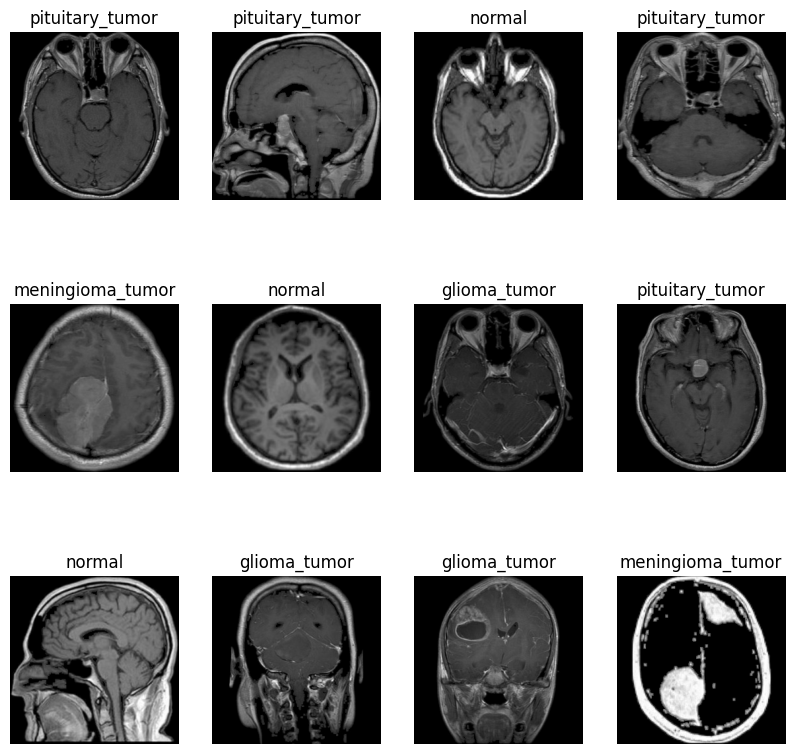

In [8]:
plt.figure(figsize=(10,10))
for image_batch , label_batch in dataset.take(1):
    for i in range(12):
        ax = plt.subplot(3,4,i+1)
        plt.imshow(image_batch[i].numpy().astype('uint8'))
        plt.axis('off')
        plt.title(class_names[label_batch[i]])

In [9]:
EPOCH=20

In [10]:
len(dataset)

97

In [11]:
train_size = 0.8
len(dataset)*train_size

77.60000000000001

In [12]:
train_ds = dataset.take(77)
len(train_ds)

77

In [13]:
test_ds = dataset.skip(77)
len(test_ds)

20

In [14]:
val_ds = test_ds.take(10)
len(val_ds)

10

In [15]:
test_ds = test_ds.skip(10)
len(test_ds)

10

In [17]:
def get_dataset_partition_tf(ds , train_split = 0.8 , val_split = 0.1 ,test_split = 0.1 , shuffle = True , shuffle_size=10000):
    
    ds_size = len(ds)
    
    if shuffle:
        ds= ds.shuffle(shuffle_size , seed=12)
    
    train_size = int(train_split*ds_size)
    val_size = int(val_split*ds_size)
    
    train_ds = ds.take(train_size)
    val_ds = ds.skip(train_size).take(val_size)
    test_ds = ds.skip(train_size).skip(val_size)
    
    return train_ds , val_ds ,test_ds 


In [18]:
train_ds , val_ds ,test_ds = get_dataset_partition_tf(dataset)

In [19]:
len(train_ds)

77

In [20]:
len(val_ds)

9

In [21]:
len(test_ds)

11

In [22]:
train_ds = train_ds.cache().shuffle(1000).prefetch(buffer_size=tf.data.AUTOTUNE)
val_ds = val_ds.cache().shuffle(1000).prefetch(buffer_size=tf.data.AUTOTUNE)
test_ds = test_ds.cache().shuffle(1000).prefetch(buffer_size=tf.data.AUTOTUNE)

In [23]:
resize_and_reshape = tf.keras.Sequential([
    layers.experimental.preprocessing.Resizing(IMAGE_SIZE,IMAGE_SIZE),
    layers.experimental.preprocessing.Rescaling(1.0/255)
])

In [24]:
data_augmentation = tf.keras.Sequential([
    layers.experimental.preprocessing.RandomFlip("horizontal_and_vertical"),
    layers.experimental.preprocessing.RandomRotation(0.2),
])

In [25]:
input_shapes = (IMAGE_SIZE , IMAGE_SIZE ,CHANNELS)
n_classes = 4
model = models.Sequential([
    layers.Conv2D(32, (3,3) , activation='relu' , input_shape = input_shapes),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(64, (3,3) , activation='relu'),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(64, (3,3) , activation='relu'),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(64, (3,3) , activation='relu'),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(64, (3,3) , activation='relu'),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(64, (3,3) , activation='relu'),
    layers.MaxPooling2D((2,2)),
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(n_classes , activation='softmax')
])

model.build(input_shape=input_shapes)

In [26]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 254, 254, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 127, 127, 32)     0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 125, 125, 64)      18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 62, 62, 64)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 60, 60, 64)        36928     
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 30, 30, 64)      

In [61]:
model.compile(
    optimizer='adam',
    loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=False),
    metrics=['accuracy']  
)

In [64]:
history = model.fit(
    train_ds,
    epochs=EPOCH,
    batch_size=BATCH_SIZE,
    verbose=1,
    validation_data=val_ds
)

Epoch 1/20


77/77 [==============================] - 307s 4s/step - loss: 1.1529 - accuracy: 0.5004 - val_loss: 1.0600 - val_accuracy: 0.5868
Epoch 2/20
77/77 [==============================] - 358s 5s/step - loss: 0.9310 - accuracy: 0.6266 - val_loss: 0.9237 - val_accuracy: 0.6111
Epoch 3/20
77/77 [==============================] - 347s 5s/step - loss: 0.7505 - accuracy: 0.6922 - val_loss: 0.6959 - val_accuracy: 0.7153
Epoch 4/20
77/77 [==============================] - 322s 4s/step - loss: 0.6019 - accuracy: 0.7691 - val_loss: 0.6668 - val_accuracy: 0.7118
Epoch 5/20
77/77 [==============================] - 269s 4s/step - loss: 0.4862 - accuracy: 0.8192 - val_loss: 0.4099 - val_accuracy: 0.8438
Epoch 6/20
77/77 [==============================] - 243s 3s/step - loss: 0.4007 - accuracy: 0.8404 - val_loss: 0.4628 - val_accuracy: 0.8125
Epoch 7/20
77/77 [==============================] - 237s 3s/step - loss: 0.3599 - accuracy: 0.8673 - val_loss: 0.5974 - val_accuracy: 0.8056
Epoch 8/20
77/77 [======

In [65]:
model.save('Brain_tumor.h5')

In [27]:
model = tf.keras.models.load_model('Brain_tumor.h5')

In [28]:
scores = model.evaluate(test_ds)

11/11 [==============================] - 16s 838ms/step - loss: 0.2113 - accuracy: 0.9403


In [29]:
scores

[0.21129241585731506, 0.9403409361839294]

In [30]:
class_names = dataset.class_names
class_names

['glioma_tumor', 'meningioma_tumor', 'normal', 'pituitary_tumor']

first image to predict
actual label: pituitary_tumor
1/1 [==============================] - 2s 2s/step
predicted label :  pituitary_tumor


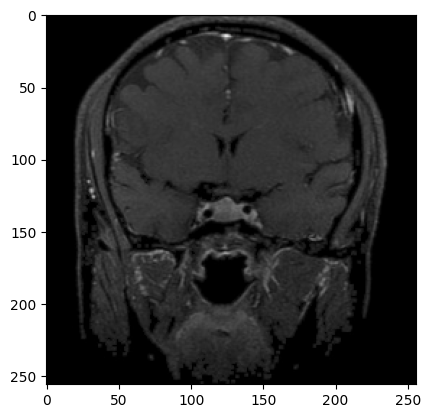

In [129]:
for images_batch , labels_batch in test_ds.take(1):
    first_image = images_batch[0].numpy().astype('uint8')
    first_label = labels_batch[0].numpy()

    print('first image to predict')
    plt.imshow(first_image)
    print('actual label:' , class_names[first_label])

    batch_prediction = model.predict(images_batch)
    print('predicted label : ' , class_names[np.argmax(batch_prediction[0])])

In [31]:
import os

In [32]:
from PIL import Image

1/1 [==============================] - 0s 89ms/step
[[8.1620913e-04 8.0633042e-03 9.9109858e-01 2.1956179e-05]]
confidence is : % 99
normal


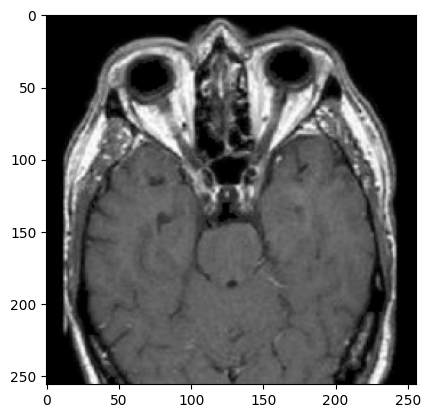

In [51]:
image_path = 'C://Users//user//Desktop//Brain_tumor_detection//training//Test//3.png'
image_path2 = 'C://Users//user//Desktop//Brain_tumor_detection//training//Data//normal//N_1.jpg'
imag = tf.keras.preprocessing.image.load_img(image_path2 , target_size=(IMAGE_SIZE,IMAGE_SIZE))
imag_array= tf.keras.preprocessing.image.img_to_array(imag)
x_train = np.expand_dims(imag_array, axis=0)
prediction = model.predict(x_train)
confidence = np.max(prediction)
print(prediction)
print('confidence is : %',int(confidence*100))
print(class_names[np.argmax(prediction)])
img_show = plt.imread(image_path2)
plt.imshow(img_show)
plt.show()